# IMPORT LIBRARIES

In [1]:
# import used libraries
import pandas as pd                        # pandas for data analysis
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt            # matplotlib for data visualisation
from scipy import stats  
import numpy as np

***
# Loading data 

In [2]:
DIR = "data/"

#read
ENT_TIMESERIES_PATH = DIR + "ent_timeseries_en.tsv.zip"
ENT_CHANNELS_PATH   = DIR + "ent_channels_en.tsv.zip"
ENT_METADATA_PATH   = DIR + "ent_metadata_en.tsv.zip"

In [3]:
# entertainment timeseries
ent_timeseries = pd.read_csv(ENT_TIMESERIES_PATH)
ent_timeseries.datetime = pd.to_datetime(ent_timeseries.datetime)

# entertainment channels
ent_channels   = pd.read_csv(ENT_CHANNELS_PATH)
ent_channels.join_date = pd.to_datetime(ent_channels.join_date)

# entertainment metadata
ent_metadata   = pd.read_csv(ENT_METADATA_PATH)
ent_metadata.upload_date = pd.to_datetime(ent_metadata.upload_date)

***
# Display dataframes

In [4]:
#display timeseries
ent_timeseries

,channel,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity,evolution,has_buzzed
0,UC_k3BRoDOosVANkGzgPOW5g,2016-03-28,1.835155e+06,5433.241860,6536.851163,0.000000,111,0,0,0.000000,0
1,UC_k3BRoDOosVANkGzgPOW5g,2016-04-04,1.874842e+06,39686.288372,6732.981395,196.130233,111,0,0,0.029130,0
2,UC_k3BRoDOosVANkGzgPOW5g,2016-04-11,1.916769e+06,41927.469767,6919.250000,186.268605,111,0,0,0.026920,0
3,UC_k3BRoDOosVANkGzgPOW5g,2016-04-18,1.954370e+06,37601.000000,7049.500000,130.250000,111,0,0,0.018476,0
4,UC_k3BRoDOosVANkGzgPOW5g,2016-04-25,1.985741e+06,31371.222222,7143.111111,93.611111,111,0,0,0.013105,0
...,...,...,...,...,...,...,...,...,...,...,...
166512,UCsvSWMifNtM0t_s9fEJdlag,2019-09-02,2.323838e+06,3073.636364,10538.090909,0.000000,159,0,0,0.000000,0
166513,UCsvSWMifNtM0t_s9fEJdlag,2019-09-09,2.315400e+06,0.000000,10523.545455,0.000000,159,0,0,0.000000,0
166514,UCsvSWMifNtM0t_s9fEJdlag,2019-09-16,2.298329e+06,0.000000,10500.000000,0.000000,159,0,0,0.000000,0
166515,UCsvSWMifNtM0t_s9fEJdlag,2019-09-23,2.290509e+06,0.000000,10500.000000,0.000000,159,0,0,0.000000,0


In [5]:
#sort channels by evolution score
ent_channels.sort_values(by=['evo_score'], inplace=True, ascending=False)

#display channels
ent_channels

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights,initial_subs,evo_score,has_buzzed
641,Entertainment,2019-02-03,UCtXjVUXfl0vD_GFQHuupe5Q,LOVE MUSIC,18393,77,583678.0,6.6630,6587.200000,0.254397,1
345,Entertainment,2019-05-31,UCGS9evApv_T-ZZbSmHi4oBA,ALI's Tarot,49000,292,141099.0,5.3170,5028.294118,0.207858,1
421,Entertainment,2019-05-29,UCrK32JVzSVSmvG2H2fXIK2w,Britt Jokes,34800,32,238410.0,5.6755,5702.000000,0.188748,1
146,Entertainment,2018-07-19,UCNpl8LVL6YInh8w76w0AH8w,PhiloSophic,257000,10,35555.0,3.2475,8475.000000,0.186758,1
43,Entertainment,2019-04-01,UCtLigqC6teXDeSi2vWJUVVg,Maggie and Shanti,690000,45,11907.0,2.7070,5289.500000,0.157641,1
...,...,...,...,...,...,...,...,...,...,...,...
1268,Entertainment,2006-04-21,UC25YiVMrG8NN1jyaOELmleQ,Shaun Wood,10223,25,968613.0,53.1435,9144.750000,0.000718,0
1241,Entertainment,2011-06-16,UCTpmBPkDta2xi5sxQESRcNA,Jennifer Brooks,10600,459,941654.0,53.1435,9579.666667,0.000673,0
1252,Entertainment,2006-05-18,UCcJuYgOg_Hm3dySP7DsFElQ,Robin C.,10600,1241,962319.0,53.1435,9792.068063,0.000605,0
1274,Entertainment,2011-03-01,UChN6SlSBv21jbp6n1XRSbJA,thesongadayproject,10100,2624,977759.0,53.1435,9963.000000,0.000297,0


In [6]:
#rename channel column in metadata
ent_metadata.rename(columns={'channel_id': 'channel'}, inplace=True)

#add column with has_buzzed in metadata
ent_metadata = pd.merge(ent_metadata, ent_channels[['channel', 'has_buzzed']], on='channel')

#display metadata
ent_metadata

,channel,description,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count,has_buzzed
0,UCztk4LFUIk4Ao4TCvpdnDsg,Music: Dil De Diya Hai ( youtube.com/watchv=p3...,65.0,FQ_r9pGTLAs,415,3236.0,NaN,Bewafai | बेवफाई | بے وفائی,2019-09-20,45879.0,1
1,UCztk4LFUIk4Ao4TCvpdnDsg,Music: Islamic Nasheed.\nTitle: Khamoshi Part ...,43.0,5My0Au_MK18,190,3973.0,"خاموشی,#Khamoshi #Urdu #Syed #Jassim #Ali",خاموشی | Khamoshi Part 2...,2019-09-05,72677.0,1
2,UCztk4LFUIk4Ao4TCvpdnDsg,Music: Islamic Nasheed.\nTitle: Khamoshi...\nN...,58.0,LoqwQLv0dzw,263,5106.0,#Khamoshi #Syed #Jassim #Ali #Narration #Motiv...,Khamoshi...,2019-08-29,101393.0,1
3,UCztk4LFUIk4Ao4TCvpdnDsg,NaN,13.0,1IvGSP_DXRE,487,458.0,NaN,Back Again...,2019-08-25,7019.0,1
4,UCztk4LFUIk4Ao4TCvpdnDsg,NaN,12.0,kP5qOBLhVc0,4559,467.0,NaN,Q & A,2019-08-25,6242.0,1
...,...,...,...,...,...,...,...,...,...,...,...
379438,UC-8QCVf10-suYAeutMRqAsw,"Bowl, turned, carved and painted. From a cher...",0.0,NFdVcCOu2l0,195,70.0,"Autism,Autism (Disease Or Medical Condition),a...",Woodturning the Autism Bowl,2015-05-14,1487.0,1
379439,UC-8QCVf10-suYAeutMRqAsw,Using the Lathe and various other tools and me...,0.0,I0Df4RgZHNk,411,32.0,"lathe,bowl,bowl making,bowl carving,Ranger,Ran...",Woodturning the Ranger Crest Bowl,2015-04-28,622.0,1
379440,UC-8QCVf10-suYAeutMRqAsw,"For my friend and brother, A wood carving of t...",0.0,SeTZPW3Fosk,543,45.0,"Wood Carving (xyloglyphy) (Hobby),Green Beret,...",U.S. Army Special Forces Emblem wood carving,2015-04-17,3405.0,1
379441,UC-8QCVf10-suYAeutMRqAsw,wood carving using various tools,1.0,t3JDgj5cFsg,435,79.0,"Eagle,Globe,Marine Corps,EGA,Anchor,Eagle glob...","Eagle, Globe, and Anchor wood carving",2015-04-10,6502.0,1


***
# Analysis parameter 
Let's add these informations on each videos from metadata
- `numwords` : number of words in the title 
- `num_capital_word`: number of words in capital letter in title
- `is_capital_title` : 1 if there is more than 2 words in capital letter in the title, 0 otherwise
- `feat` : 1 if the title contains a a word in the list of `featuring_wordsets`, 0 otherwise
- `is_tags` : 1 if the video has tags, 0 otherwise
- `numtags` : the number of tags used in the video


##### NUMWORDS

In [7]:
#counts the number of words in a string
def count_words_simple(string):
    return len(string.split(" "))
    
#numwords in title
ent_metadata['numwords'] = ent_metadata["title"].apply(count_words_simple)

##### CAPITAL TITLE

In [8]:
#number of capital words in title
ent_metadata['num_capital_word'] = ent_metadata["title"].apply(lambda x : sum(map(str.isupper, x.split())))

#capital title if 2 or more words are capital
ent_metadata['is_capital_title'] = (ent_metadata.num_capital_word >= 2).astype(int)

##### FEATURINGS

In [9]:
#featuring 
featuring_wordsets = ['ft', 'ft.', 'feat.', 'featuring', 'with', 'collab', 'w/']

# is_in_string is a fuction returning 1 if a word from a wordlist is in a string, 0 otherwise
def is_in_string (string, wordlist):
    return any(word in string.lower().split(' ') for word in wordlist) * 1

ent_metadata['feat'] = ent_metadata['title'].apply(is_in_string, args=[featuring_wordsets])

##### NUMBER OF TAGS

In [10]:
# counts number of tags splitted by ","
def count_tags(string):
    return len(str(string).split(","))

# is there a tag ?
ent_metadata['is_tags'] = 1 - (ent_metadata['tags'].isna())*1

# number of tags
ent_metadata['numtags'] = ent_metadata["tags"].apply(count_tags) * ent_metadata['is_tags']


***
# Compute the mean of all features by channel


##### Compute all means then merge on channel

In [11]:
ent_channels = pd.merge(ent_channels,
                        ent_metadata.groupby('channel').mean()[['duration','numtags','is_capital_title','numwords','feat','is_tags','view_count']],
                        on = 'channel')
ent_channels = pd.merge(ent_channels,
                        ent_timeseries.groupby('channel').mean()[['delta_videos']], 
                        on = 'channel')

##### Rename columns

In [12]:
ent_channels.rename(columns={'duration':'mean_duration', 
                             'numtags':'mean_numtags', 
                             'is_capital_title':'mean_capital_title',
                             'numwords':'mean_numwords',
                             'feat':'mean_feats', 
                             'is_tags':'mean_is_tags',
                             'view_count':'mean_view_count',
                             'delta_videos':'week_freq'}, inplace=True)

all_channel_parameters = ['mean_capital_title','mean_numwords','mean_feats','mean_duration','mean_numtags','mean_is_tags','week_freq']

In [13]:
#display channels
ent_channels

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights,initial_subs,evo_score,has_buzzed,mean_duration,mean_numtags,mean_capital_title,mean_numwords,mean_feats,mean_is_tags,mean_view_count,week_freq
0,Entertainment,2019-02-03,UCtXjVUXfl0vD_GFQHuupe5Q,LOVE MUSIC,18393,77,583678.0,6.6630,6587.200000,0.254397,1,330.677083,18.114583,0.156250,12.708333,0.020833,1.000000,1.083585e+05,9.400000
1,Entertainment,2019-05-31,UCGS9evApv_T-ZZbSmHi4oBA,ALI's Tarot,49000,292,141099.0,5.3170,5028.294118,0.207858,1,993.879365,16.447619,0.930159,10.507937,0.028571,0.949206,1.028716e+04,16.500000
2,Entertainment,2019-05-29,UCrK32JVzSVSmvG2H2fXIK2w,Britt Jokes,34800,32,238410.0,5.6755,5702.000000,0.188748,1,843.551724,16.482759,1.000000,6.517241,0.000000,1.000000,1.716081e+05,1.750000
3,Entertainment,2018-07-19,UCNpl8LVL6YInh8w76w0AH8w,PhiloSophic,257000,10,35555.0,3.2475,8475.000000,0.186758,1,676.300000,10.700000,0.000000,15.900000,0.000000,1.000000,2.368206e+06,0.466667
4,Entertainment,2019-04-01,UCtLigqC6teXDeSi2vWJUVVg,Maggie and Shanti,690000,45,11907.0,2.7070,5289.500000,0.157641,1,215.108696,8.913043,0.000000,7.260870,0.239130,0.869565,4.448043e+06,1.760000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1273,Entertainment,2006-04-21,UC25YiVMrG8NN1jyaOELmleQ,Shaun Wood,10223,25,968613.0,53.1435,9144.750000,0.000718,0,209.666667,5.166667,0.333333,6.166667,0.083333,0.833333,2.347083e+03,0.064171
1274,Entertainment,2011-06-16,UCTpmBPkDta2xi5sxQESRcNA,Jennifer Brooks,10600,459,941654.0,53.1435,9579.666667,0.000673,0,928.506061,39.836364,1.000000,9.545455,0.030303,1.000000,2.965409e+03,0.839779
1275,Entertainment,2006-05-18,UCcJuYgOg_Hm3dySP7DsFElQ,Robin C.,10600,1241,962319.0,53.1435,9792.068063,0.000605,0,563.749522,24.878585,0.017208,10.172084,0.087954,1.000000,1.126838e+03,3.119565
1276,Entertainment,2011-03-01,UChN6SlSBv21jbp6n1XRSbJA,thesongadayproject,10100,2624,977759.0,53.1435,9963.000000,0.000297,0,247.880750,35.572402,0.024986,14.120386,0.014764,0.998296,4.229425e+03,6.971591


***
# Random Forest

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = ent_channels[all_channel_parameters]
y = ent_channels['has_buzzed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# view the classification report, which contains precision
report = classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(report)

,0,1,accuracy,macro avg,weighted avg
precision,0.720280,0.725664,0.722656,0.722972,0.722846
recall,0.768657,0.672131,0.722656,0.720394,0.722656
f1-score,0.743682,0.697872,0.722656,0.720777,0.721851
support,134.000000,122.000000,0.722656,256.000000,256.000000


***
# Importance of features 

In [15]:
import time
import numpy as np

start_time = time.time()

importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.008 seconds


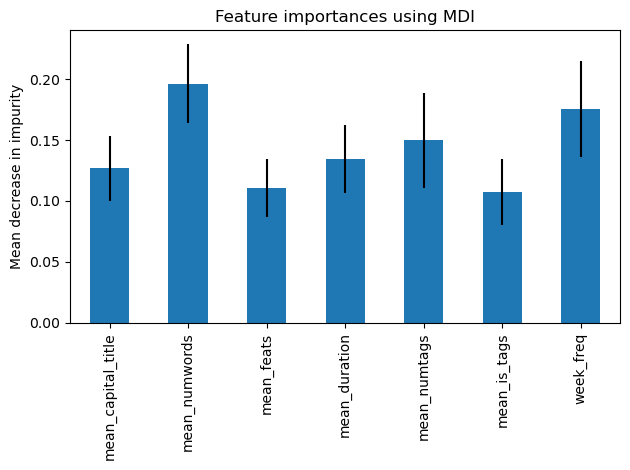

In [16]:
import pandas as pd

forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [17]:
# print the means of the channels that have buzzed
ent_channels[ent_channels['has_buzzed']==1][all_channel_parameters].mean()

mean_capital_title      0.308620
mean_numwords           9.599641
mean_feats              0.087396
mean_duration         746.624305
mean_numtags           14.609532
mean_is_tags            0.787015
week_freq               2.624839
dtype: float64

In [18]:
#print the means of the channels that have not buzzed
ent_channels[ent_channels['has_buzzed']==0][all_channel_parameters].mean()

mean_capital_title      0.217721
mean_numwords           7.865057
mean_feats              0.064536
mean_duration         617.690441
mean_numtags           13.547538
mean_is_tags            0.835456
week_freq               1.045409
dtype: float64

***
# Linear regression

##### Mean video duration for each channel

In [19]:
import statsmodels.formula.api as smf
model = smf.ols(formula='mean_duration ~ C(has_buzzed)', data=ent_channels)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          mean_duration   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.739
Date:                Thu, 15 Dec 2022   Prob (F-statistic):             0.0982
Time:                        19:03:31   Log-Likelihood:                -11064.
No. Observations:                1278   AIC:                         2.213e+04
Df Residuals:                    1276   BIC:                         2.214e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            617.6904     55

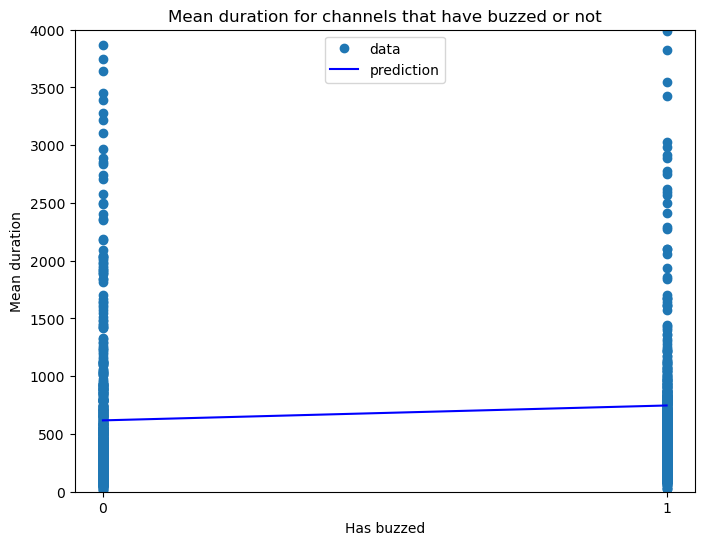

In [20]:
pred_ols = res.fittedvalues
fig, ax = plt.subplots(figsize=(8, 6))

#x is has_buzzed
x = ent_channels['has_buzzed']
#y is mean_duration
y = ent_channels['mean_duration']

ax.plot(x, y, "o", label="data")
ax.plot(x, pred_ols, "b-", label="prediction")
plt.legend()
plt.ylim(0, 4000)
plt.xticks([0, 1])
plt.title("Mean duration for channels that have buzzed or not")
plt.xlabel("Has buzzed")
plt.ylabel("Mean duration")

plt.show()

***
# Most used tags in all videos

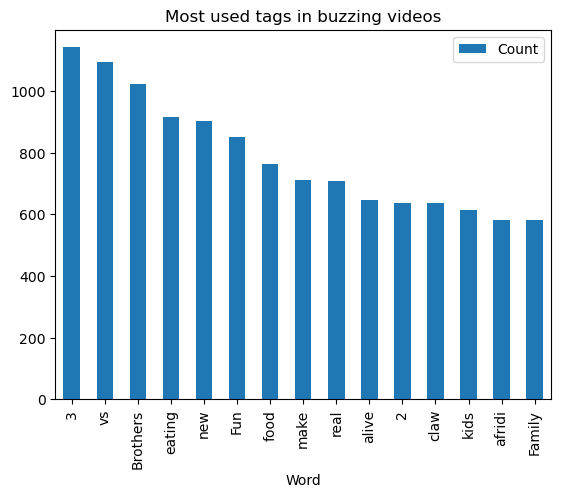

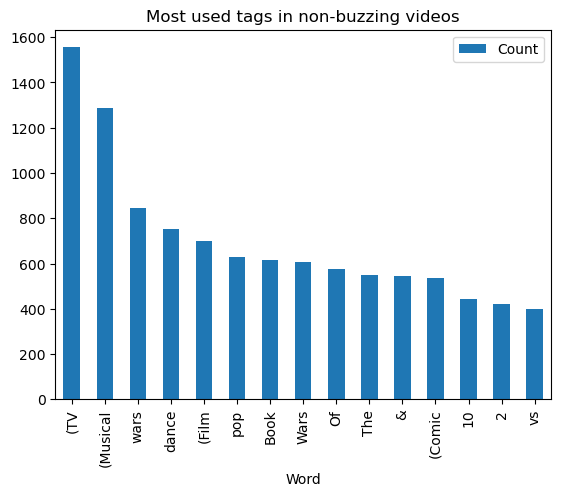

In [21]:
#remove all comomon words in a list of words
def remove_common_words(wordlist):
    common_words = ['the','a','in','of','and','to','for','on','with','is','at','by','from','as','an',
                    'be','that','this','it','its','are','have','has','had','was','were','will','would',
                    'could','can','may','might','must','should','if','then','than','so','or','but','not',
                    'no','all','any','both','each','few','more','most','other','some','such','what','when',
                    'where','which','who','whom','why','how','i','me','my','myself','we','our','ours',
                    'ourselves','you','your','yours','yourself','yourselves','he','him','his','himself',
                    'she','her','hers','herself','it','its','itself','they','them','their','theirs','themselves',
                    'what','which','who','whom','this','that','these','those','am','is','are','was','were',
                    'be','been','being','have','has','had','having','do','does','did','doing','a','an','the',
                    'and','but','if','or','because','as','until','while','of','at','by','for','with','about',
                    'against','between','into','through','during','before','after','above','below','to',
                    'from','up','down','in','out','on','off','over','under','again','further','then','once',
                    'here','there','when','where','why','how','all','any','both','each','few','more','most',
                    'other','some','such','no','nor','not','only','own','same','so','than','too','very','s',
                    't','can','will','just','don','should','now']
    return [word for word in wordlist if word not in common_words]

from collections import Counter
  
Buz_tags = ent_metadata[ent_metadata['has_buzzed']==1].groupby('channel')['tags'].agg(pd.Series.mode).values
Nbuz_tags = ent_metadata[ent_metadata['has_buzzed']==0].groupby('channel')['tags'].agg(pd.Series.mode).values
# split() returns list of all the words in the string
split_Buz = str(Buz_tags).split()
split_Nbuz = str(Nbuz_tags).split()
lst_buz = Counter(remove_common_words(split_Buz)).most_common(15)
lst_not_buz = Counter(remove_common_words(split_Nbuz)).most_common(15)
df_1 = pd.DataFrame(lst_buz, columns = ['Word', 'Count'])
df_2 = pd.DataFrame(lst_not_buz, columns = ['Word', 'Count'])
df_1.plot.bar(x='Word',y='Count')
plt.title("Most used tags in buzzing videos")
df_2.plot.bar(x='Word',y='Count')
plt.title("Most used tags in non-buzzing videos")
plt.show()


    

***
# Boxplot

<Figure size 1000x700 with 0 Axes>

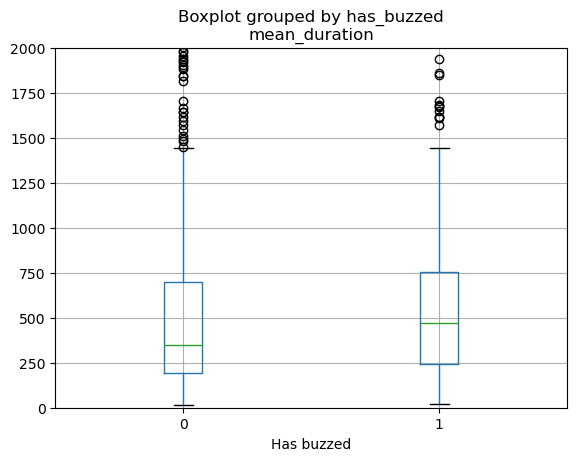

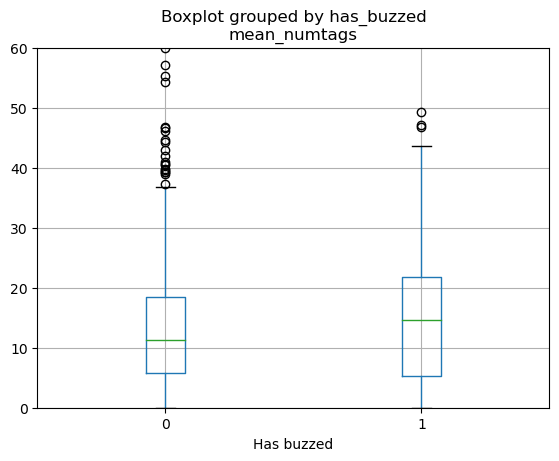

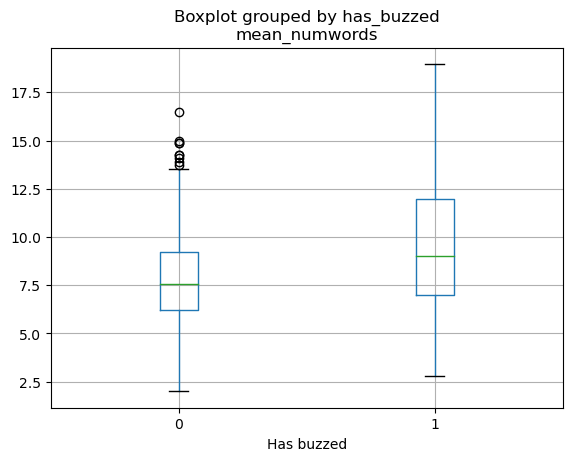

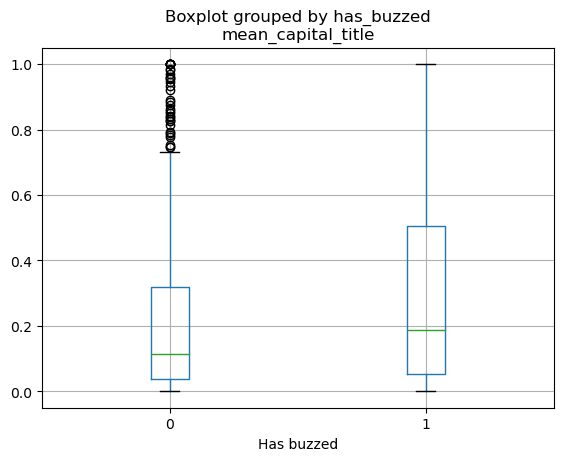

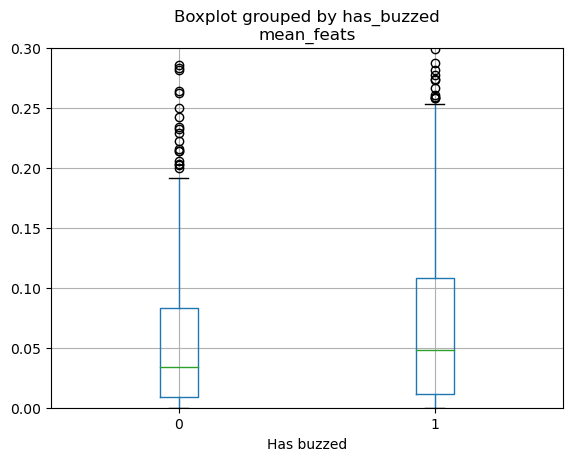

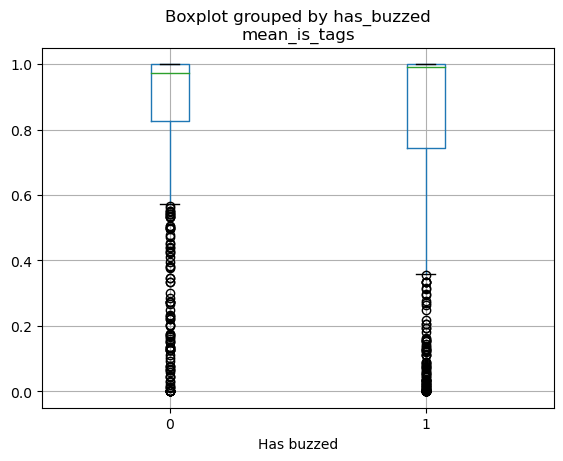

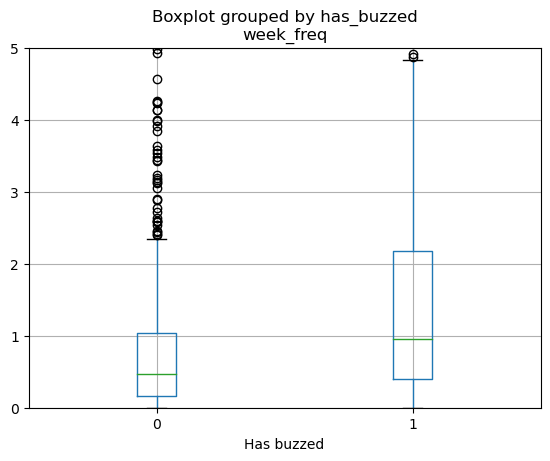

In [22]:
fig = plt.figure(figsize =(10, 7))

bp1 = ent_channels.boxplot(column=['mean_duration'], by=['has_buzzed'])
plt.xlabel('Has buzzed')
plt.ylim([0,2000])

bp2 = ent_channels.boxplot(column=['mean_numtags'], by=['has_buzzed'])
plt.xlabel('Has buzzed')
plt.ylim([0,60])

bp3 = ent_channels.boxplot(column=['mean_numwords'], by=['has_buzzed'])
plt.xlabel('Has buzzed')

bp4 = ent_channels.boxplot(column=['mean_capital_title'], by=['has_buzzed'])
plt.xlabel('Has buzzed')

bp5 = ent_channels.boxplot(column=['mean_feats'], by=['has_buzzed'])
plt.xlabel('Has buzzed')
plt.ylim([0,0.3])

bp6 = ent_channels.boxplot(column=['mean_is_tags'], by=['has_buzzed'])
plt.xlabel('Has buzzed')

bp7 = ent_channels.boxplot(column=['week_freq'], by=['has_buzzed'])
plt.ylim([0,5])
plt.xlabel('Has buzzed')

# show plot
plt.show()

***
# Lexical analysis on title 

In [23]:
# !pip install gensim
# !pip install empath
# !pip install wordcloud
# !pip install matplotlib-venn
# !pip install nltk
# !pip install plotly
# !pip install networkx

In [24]:
buzz_videos = ent_metadata[ent_metadata['has_buzzed']==1]
quiet_videos = ent_metadata[ent_metadata['has_buzzed']==0]

In [25]:
# Analysis of the lexical fields

from empath import Empath 
import operator
import plotly.graph_objects as go
import networkx as nx
from collections import Counter
from itertools import chain

lexicon = Empath()


def mean_lexical(title):
    # returns a 1 x nbr_lexical_fields dataframe associating a mean lexical field score for the whole provided quote corpus
    
    lexical_fields_dict = lexicon.analyze(title.str.cat(sep = ' '), normalize = True) #by default, analyze all lexical fields from Empath

    return lexical_fields_dict


categories_df = []
categories_df.append(mean_lexical(buzz_videos['title']))
categories_df.append(mean_lexical(quiet_videos['title']))
categories_df = pd.DataFrame(categories_df, index = ['Buzzing','Not Buzzing']) 


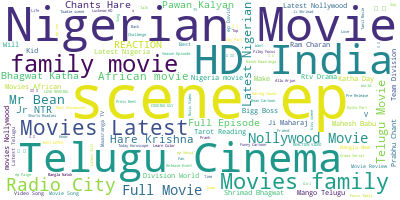

In [26]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(buzz_videos['title'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=9, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

Topics with mean of each youtuber

In [27]:
#iterate on the channels
categories_buzzing = []
for i in buzz_videos.channel.unique():
    categories_buzzing.append(mean_lexical(buzz_videos['title'][buzz_videos.channel==i]))
categories_buzzing = pd.DataFrame(categories_buzzing, index = buzz_videos.channel.unique())
    
categories_not_buzzing = []
for i in quiet_videos.channel.unique():
    categories_not_buzzing.append(mean_lexical(quiet_videos['title'][quiet_videos.channel==i]))
categories_not_buzzing = pd.DataFrame(categories_not_buzzing, index = quiet_videos.channel.unique())
  
#mean_lexical(buzz_videos['title'][buzz_videos.channel=='UCztk4LFUIk4Ao4TCvpdnDsg'])

In [28]:
categories_buzzing = pd.DataFrame(categories_buzzing.mean())
categories_buzzing.columns = ['Buzzing']
categories_not_buzzing= pd.DataFrame(categories_not_buzzing.mean())
categories_not_buzzing.columns = ['Not Buzzing']

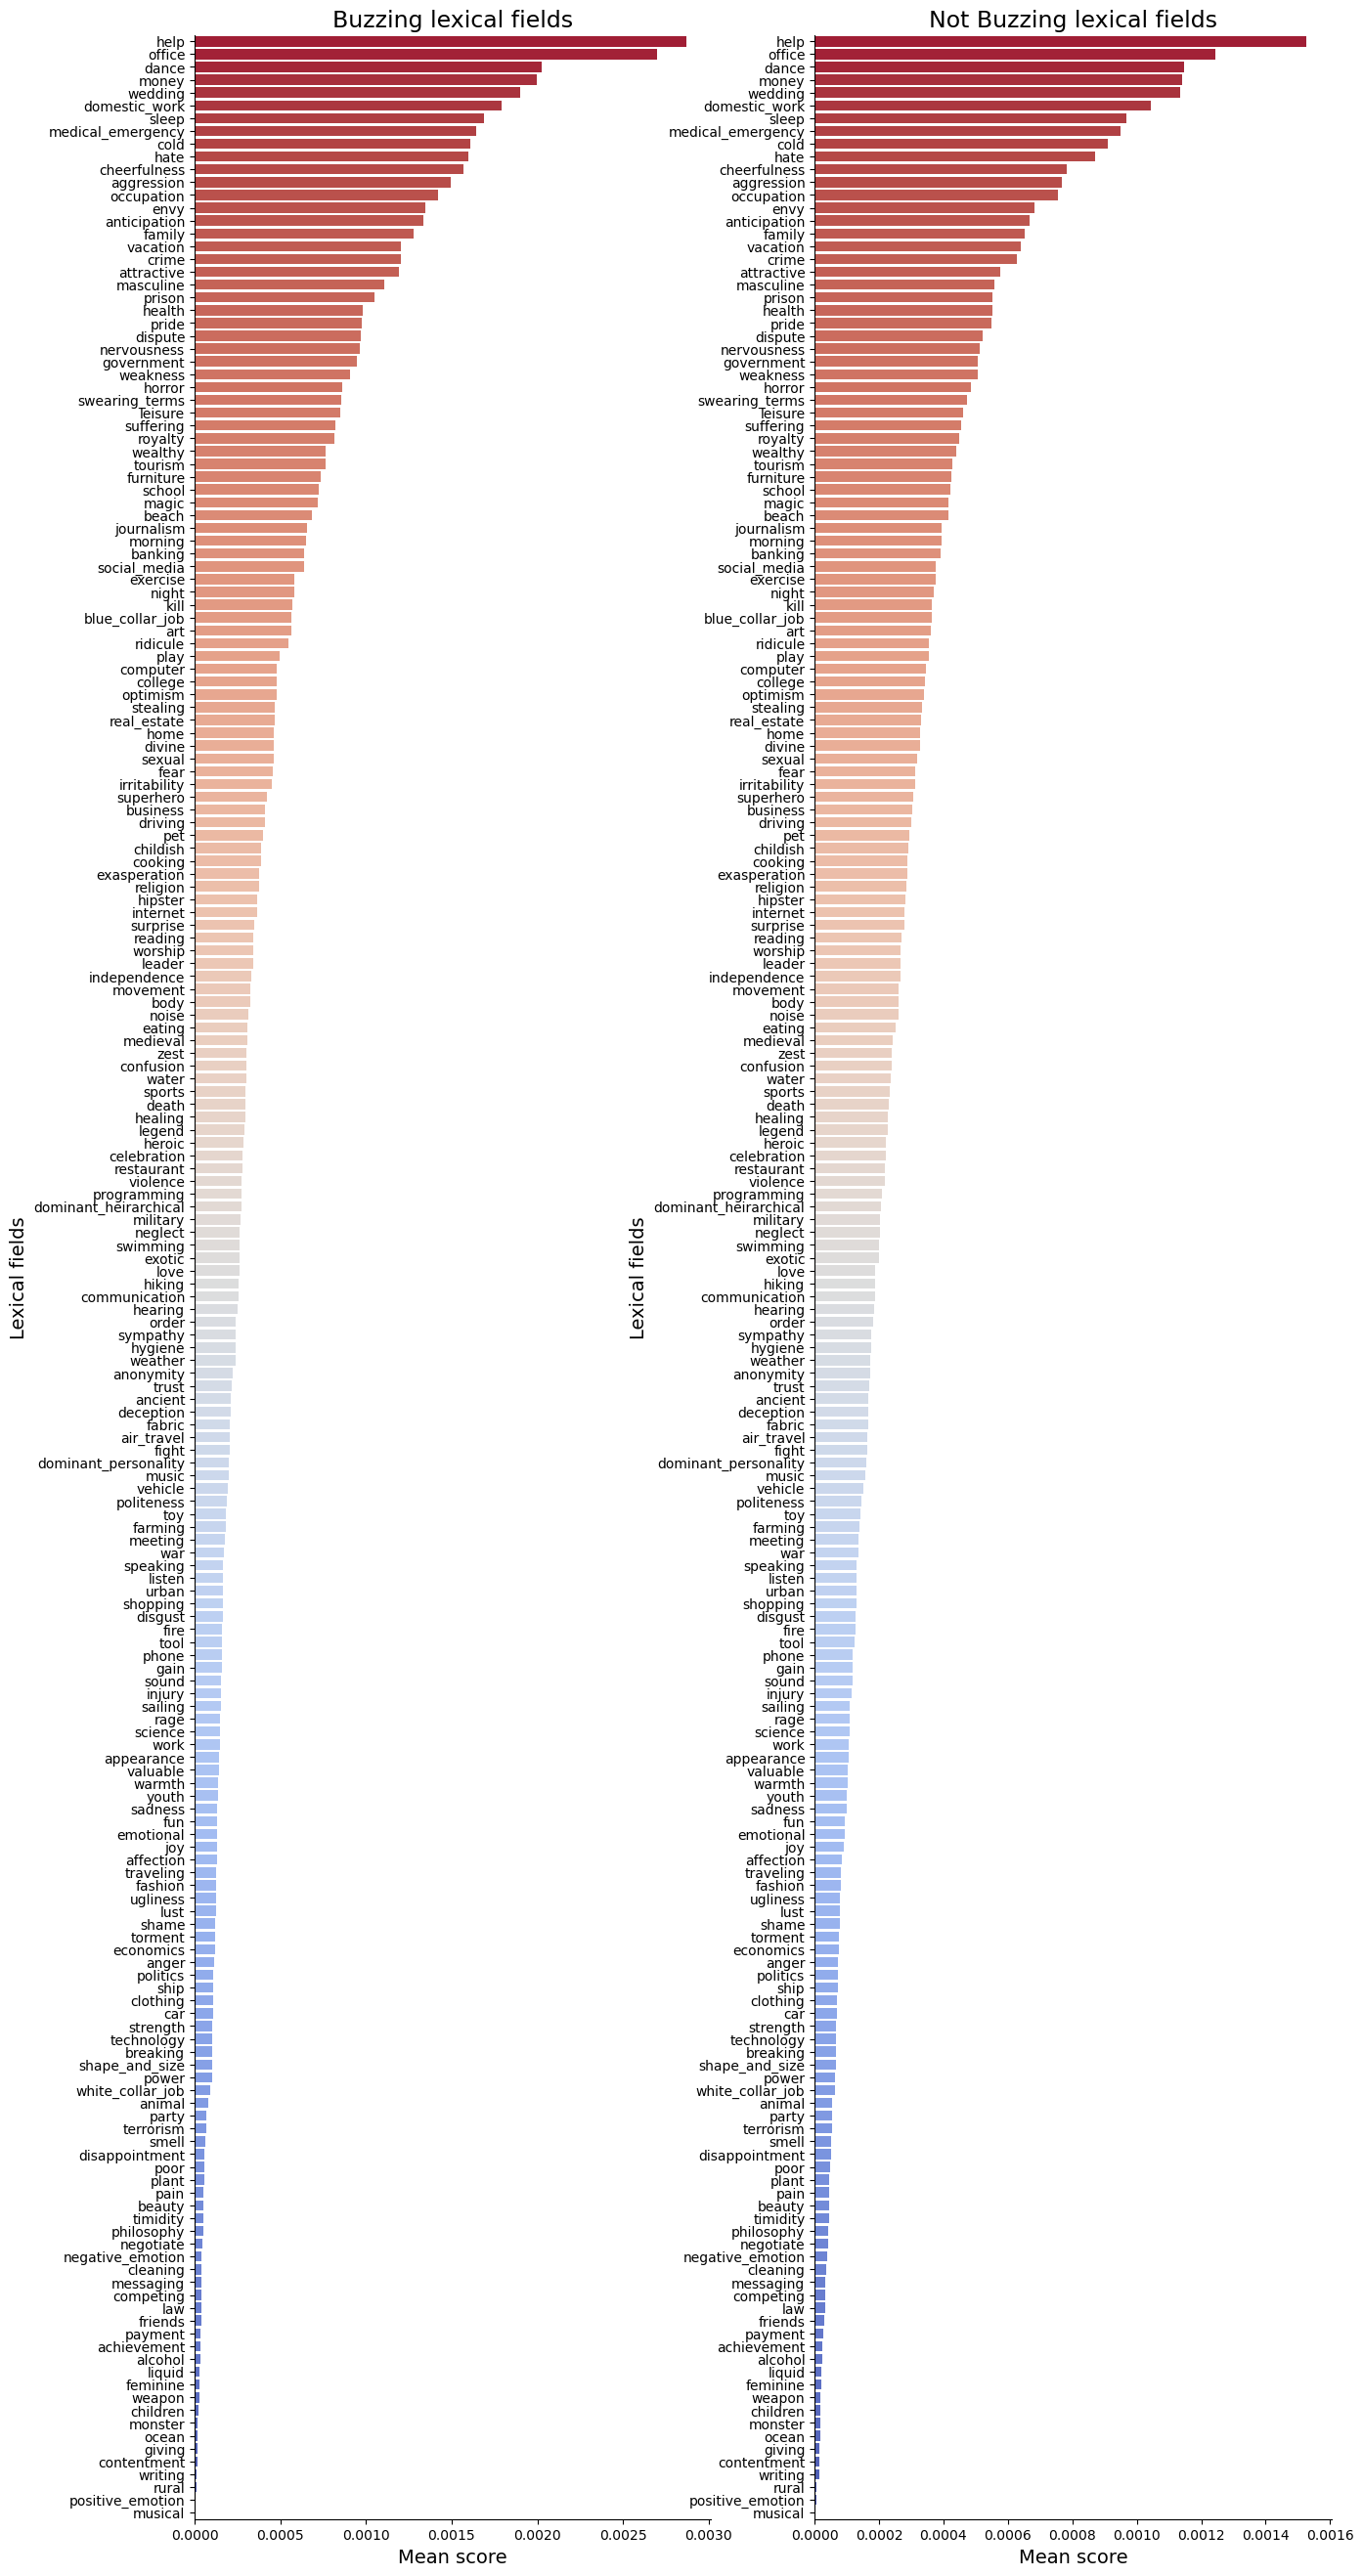

In [29]:
import seaborn as sns
#temp_df = categories.mean().copy().T 
#temp_df.reset_index(inplace=True)

fig, ax = plt.subplots(1,2, figsize=(15, 33))

palette = sns.color_palette("coolwarm", n_colors = len(categories_buzzing))
palette.reverse()

temp_df_1 = categories_buzzing.sort_values(by=['Buzzing'],  ascending=False)
sns.barplot(x = 'Buzzing', y = categories_buzzing.index, data=temp_df_1, ax = ax[0], palette = palette)
ax[0].set_title("Buzzing lexical fields", fontsize = 17)
ax[0].set_xlabel("Mean score", fontsize = 14)
ax[0].set_ylabel("Lexical fields", fontsize = 14)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

palette = sns.color_palette("coolwarm", n_colors = len(categories_not_buzzing))
palette.reverse()

temp_df_2 = categories_not_buzzing.sort_values(by=['Not Buzzing'],  ascending=False)
sns.barplot(x = 'Not Buzzing', y = categories_not_buzzing.index, data=temp_df_2, ax = ax[1], palette = palette)
ax[1].set_title("Not Buzzing lexical fields", fontsize = 17)
ax[1].set_xlabel("Mean score", fontsize = 14)
ax[1].set_ylabel("Lexical fields", fontsize = 14)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

In [ ]:
categories_df

,help,office,dance,money,wedding,domestic_work,sleep,medical_emergency,cold,hate,...,weapon,children,monster,ocean,giving,contentment,writing,rural,positive_emotion,musical
Buzzing,0.000147,0.000268,0.001516,0.000153,0.001581,0.001211,0.000100,0.000102,0.000146,0.000122,...,0.000139,0.001723,0.000064,0.000124,0.000192,0.000115,0.000146,0.000262,0.001596,0.001294
Not Buzzing,0.000142,0.000411,0.001056,0.000206,0.000289,0.000215,0.000092,0.000142,0.000183,0.000117,...,0.000288,0.000560,0.000065,0.000179,0.000238,0.000046,0.000230,0.000200,0.000420,0.000690


Topics in general

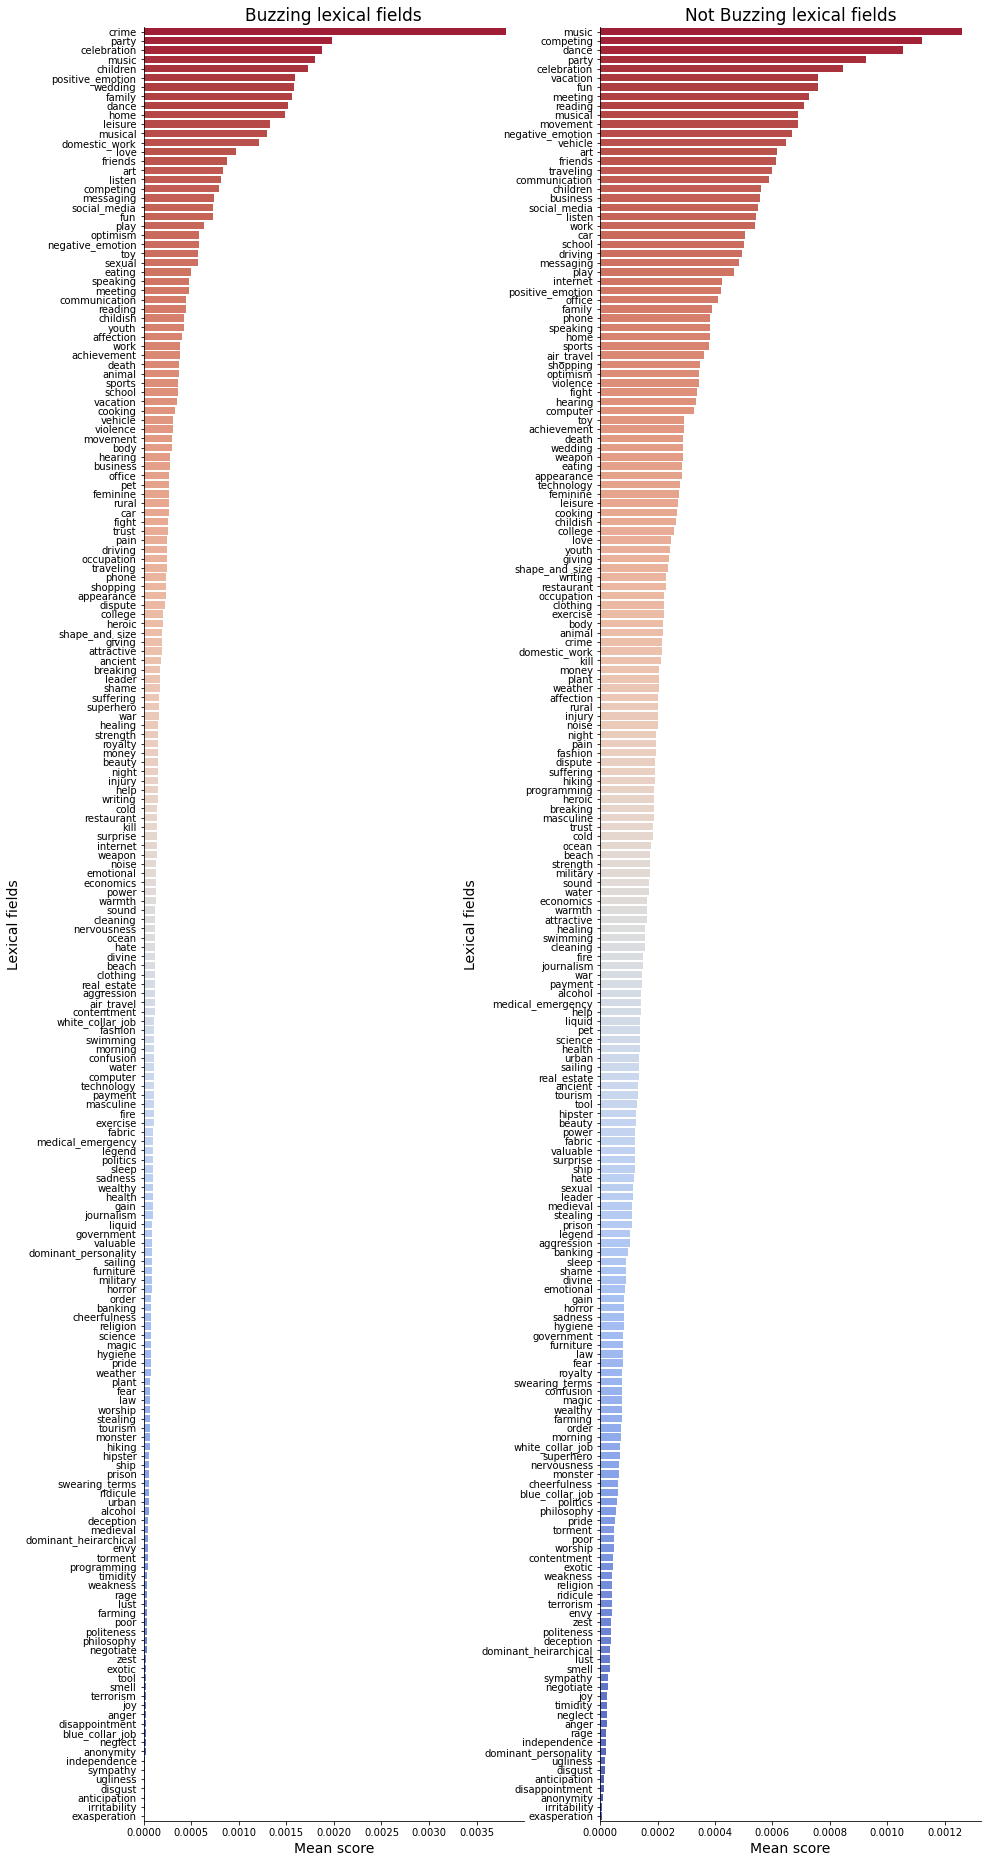

In [34]:
import seaborn as sns
temp_df = categories_df.copy().T 
temp_df.reset_index(inplace=True)

fig, ax = plt.subplots(1,2, figsize=(15, 33))

palette = sns.color_palette("coolwarm", n_colors = len(temp_df))
palette.reverse()

temp_df = temp_df.sort_values(by=['Buzzing'],  ascending=False)
sns.barplot(x = 'Buzzing', y = 'index', data=temp_df, ax = ax[0], palette = palette)
ax[0].set_title("Buzzing lexical fields", fontsize = 17)
ax[0].set_xlabel("Mean score", fontsize = 14)
ax[0].set_ylabel("Lexical fields", fontsize = 14)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

temp_df = temp_df.sort_values(by=['Not Buzzing'],  ascending=False)
sns.barplot(x = 'Not Buzzing', y = 'index', data=temp_df, ax = ax[1], palette = palette)
ax[1].set_title("Not Buzzing lexical fields", fontsize = 17)
ax[1].set_xlabel("Mean score", fontsize = 14)
ax[1].set_ylabel("Lexical fields", fontsize = 14)
ax[1].spines['right'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

In [37]:
temp_df = categories_df.copy().T 
temp_df.reset_index(inplace=True)

#number of quotes to keep per category
N = 15

#we isolate the 15 most common lexical fields from our three categories:
temp_df = temp_df.sort_values(by=['Buzzing'],  ascending=False, ignore_index=True)
Buz_LFs = temp_df.loc[:N-1,'index'].values
temp_df = temp_df.sort_values(by=['Not Buzzing'],  ascending=False, ignore_index=True)
Nbuz_LFs = temp_df.loc[:N-1,'index'].values


#we remove dupplicates:
most_common_LFs = np.concatenate([Buz_LFs, Nbuz_LFs])
most_common_LFs = np.array(most_common_LFs).ravel()
most_common_LFs = np.unique(most_common_LFs)

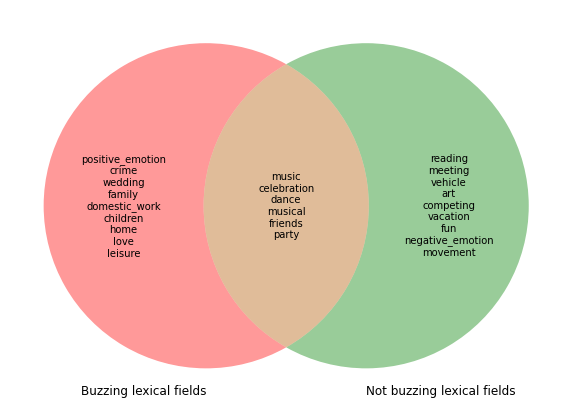

In [44]:
#Venn diagram
from matplotlib_venn import venn2
A = set(Buz_LFs)
B = set(Nbuz_LFs)

fig, ax = plt.subplots(1,1, figsize=(10, 10))

v = venn2([A, B], ('Buzzing lexical fields', "Not buzzing lexical fields"))

v.get_label_by_id('11').set_text('\n'.join(A&B))
v.get_label_by_id('10').set_text('\n'.join(A-B))
v.get_label_by_id('01').set_text('\n'.join(B-A))

# Sentiment analysis 

In [130]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()
text_1 = buzzing_videos['title'][buzzing_videos.channel=='UCztk4LFUIk4Ao4TCvpdnDsg']
text_2 =  "The pizza tastes terrible."
sent_1 = sentiment.polarity_scores(text_1)
sent_2 = sentiment.polarity_scores(text_2)
#transform sent_1 and sent_2 into a dataframe
sent_1 = pd.DataFrame.from_dict(sent_1, orient='index').T
sent_2 = pd.DataFrame.from_dict(sent_2, orient='index').T
sent_1

,neg,neu,pos,compound
0,0.022,0.978,0.0,-0.5775


In [133]:
sent_buzzing = []
for i in buzzing_videos.channel.unique():
    sent_1 = sentiment.polarity_scores(buzzing_videos['title'][buzzing_videos.channel==i])
    sent_buzzing.append(pd.DataFrame.from_dict(sent_1, orient='index').T)
sent_buzzing = pd.DataFrame(sent_buzzing, index = buzzing_videos.channel.unique())
    
sent_not_buzzing = []
for i in not_buzzing_videos.channel.unique():
    sent_2 = sentiment.polarity_scores(not_buzzing_videos['title'][not_buzzing_videos.channel==i])
    sent_not_buzzing.append(pd.DataFrame.from_dict(sent_2, orient='index').T)
sent_not_buzzing = pd.DataFrame(sent_not_buzzing, index = not_buzzing_videos.channel.unique())


In [132]:
sent_buzzing

[     neg    neu  pos  compound
 0  0.022  0.978  0.0   -0.5775,
      neg    neu    pos  compound
 0  0.181  0.739  0.081   -0.9823,
      neg   neu    pos  compound
 0  0.166  0.72  0.114   -0.9953,
      neg    neu    pos  compound
 0  0.084  0.843  0.073   -0.9391,
      neg    neu   pos  compound
 0  0.025  0.854  0.12    0.9991,
      neg    neu    pos  compound
 0  0.098  0.809  0.094    0.4406,
      neg    neu    pos  compound
 0  0.076  0.828  0.096    0.7601,
     neg    neu    pos  compound
 0  0.01  0.829  0.161    0.9999,
      neg    neu    pos  compound
 0  0.024  0.854  0.122    0.9959,
      neg    neu   pos  compound
 0  0.029  0.801  0.17    0.9584,
      neg    neu    pos  compound
 0  0.229  0.756  0.015   -0.9954,
    neg    neu    pos  compound
 0  0.0  0.982  0.018     0.586,
      neg    neu    pos  compound
 0  0.039  0.842  0.119    0.9972,
      neg    neu    pos  compound
 0  0.016  0.869  0.115       1.0,
      neg    neu    pos  compound
 0  0.076  0.696